In [ ]:
!pip install explainerdashboard

     |████████████████████████████████| 296kB 3.9MB/s 
     |████████████████████████████████| 471kB 19.9MB/s 
     |████████████████████████████████| 358kB 19.8MB/s 
     |████████████████████████████████| 194kB 25.6MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 1.0MB 24.5MB/s 
     |████████████████████████████████| 3.5MB 30.3MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 1.8MB 45.2MB/s 
     |████████████████████████████████| 358kB 37.7MB/s 
     |████████████████████████████████| 174kB 38.2MB/s 
  Created wheel for dash-auth: filename=dash_auth-1.4.1-cp37-none-any.whl size=476153 sha256=5f3afdccedc1f9595b0e6d3e39c51039af195ed2c645076e9553efba72ffc6b1
  Stored in directory: /root/.cache/pip/wheels/9b/6d/64/a95a7e2050ba5

In [1]:
from sklearn.ensemble import RandomForestClassifier

from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, feature_descriptions

X_train, y_train, X_test, y_test = titanic_survive()
model = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)

explainer = ClassifierExplainer(model, X_test, y_test, 
                               cats=['Sex', 'Deck', 'Embarked'],
                               descriptions=feature_descriptions,
                               labels=['Not survived', 'Survived'])

ExplainerDashboard(explainer).run()

ModuleNotFoundError: ignored

In [ ]:
from explainerdashboard import InlineExplainer

InlineExplainer(explainer).shap.dependence()
InlineExplainer(explainer).shap.dependence(hide_cats=True, hide_index=True, col="Fare")
InlineExplainer(explainer).shap.overview()
InlineExplainer(explainer).tab.importances()

/usr/local/lib/python3.7/dist-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: ignored

In [ ]:
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg

delta = 0.1
C = 0.01
T = 20
h_T = 0.1

time = np.arange(T)
accuracy = 0.9+ np.sin(time/T*4*np.pi)/T - 0.1*(time/T) + np.random.randn(T)/20
accuracy[0] = 0.9

kde = KernelReg(endog=accuracy, exog=time, var_type='c', bw=[h_T*T])
estimated_accuracy = kde.fit(time)[0]

if max(np.abs(estimated_accuracy - 0.9)) > delta + C/np.sqrt(h_T**2*T):
    s = np.where(np.abs(estimated_accuracy - 0.9) > delta)[0][0]
    print("The model's performance dropped below 80% at s = " + str(s))
else:
    print('Model is working fine.')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The model's performance dropped below 80% at s = 7


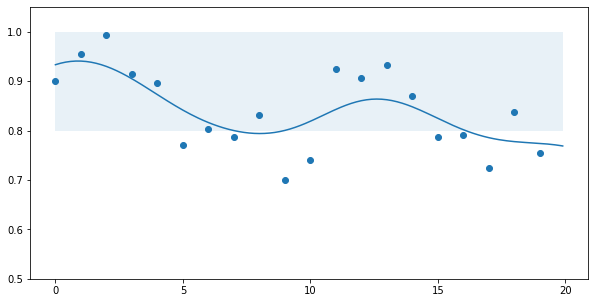

In [ ]:
import matplotlib.pyplot as plt

cont_time = np.arange(200)/10
lle = kde.fit(cont_time)

lle = np.reshape(lle[0],200)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, accuracy, 'o', color='tab:blue')
ax.plot(cont_time, lle, '-', color='tab:blue')
ax.fill_between(cont_time, 0.8, 1.0, alpha=0.1)
ax.set_ylim(bottom=0.5, top=1.05)
ax.set_xticks([0,5,10,15,20])

plt.show()

In [1]:
!pip install tensorflow-data-validation


     |████████████████████████████████| 1.4MB 5.0MB/s 
     |████████████████████████████████| 9.6MB 29.1MB/s 
     |████████████████████████████████| 17.7MB 238kB/s 
     |████████████████████████████████| 296kB 35.0MB/s 
     |████████████████████████████████| 2.3MB 31.3MB/s 
     |████████████████████████████████| 153kB 31.7MB/s 
     |████████████████████████████████| 2.3MB 27.0MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 829kB 27.2MB/s 
     |████████████████████████████████| 276kB 38.8MB/s 
     |████████████████████████████████| 153kB 42.1MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 184kB 39.9MB/s 
     |████████████████████████████████| 174kB 40.5MB/s 
     |████████████████████████████████| 440kB 29.0MB/s 
     |████████████████████████████████| 174kB 37.4MB/s 
     |████████████████████████████████| 256kB 46.5MB/s 
  Created wheel for dill: filename=dill-0.3.1.1-cp37